# Get Journalist Tweets

In [1]:
import sys

In [2]:
sys.path.insert(1, '../')

In [3]:
from src.data import journalists as journos
from src.data.api_tweepy import connect_API
from src.data import api_tweet_tools as att

In [4]:
keyword = 'cyber'
journo_handles = journos.get_handles_by_keyword(keyword)
print(len(journo_handles))

12


In [5]:
print(journo_handles)

['jennystrasburg', 'dannsimmons', 'LeoKelion', 'gordoncorera', 'joetidy', '_lucyingham', 'dannyjpalmer', 'SophiaFurber', 'SCFGallagher', 'MsHannahMurphy', 'JesscaHaworth', 'Ad_Nauseum74']


In [4]:
api_keys_fp = '../data/twitter_credentials.json'
tw_api = connect_API(api_keys_fp)

In [9]:
att.batch_request_user_timeline(tw_api, journo_handles, '../data/raw/cyber_tweets/', api_delay=0.2, n_tweets=3200)

,user_id,name,screen_name,tweet_created_at,tweet_id,text,truncated,display_text_range,source,source_url,...,extended_entities,hashtags,symbols,mentions,urls,media,rt_id,rt_user_id,rt_screen_name,rt_text
0,244169661,jenny strasburg,jennystrasburg,2020-08-26 21:06:56,1298728661856784387,RT @dnvolz: Hackers tied to the North Korean g...,False,"[0, 140]",Twitter for iPhone,http://twitter.com/download/iphone,...,NaN,[],[],[dnvolz],[],NaN,1.298709e+18,2.366443e+07,dnvolz,Hackers tied to the North Korean government ar...
1,244169661,jenny strasburg,jennystrasburg,2020-08-26 16:16:59,1298655692623142914,It’s #nationaljealousidonthaveadogday https://...,False,"[0, 37]",Twitter for iPhone,http://twitter.com/download/iphone,...,NaN,[nationaljealousidonthaveadogday],[],[],"[{'url': 'https://t.co/uhMrGmwW6F', 'expanded_...",NaN,NaN,NaN,None,NaN
2,244169661,jenny strasburg,jennystrasburg,2020-08-26 13:18:42,1298610826539081730,@jasonzweigwsj can you please name them,False,"[15, 39]",Twitter Web App,https://mobile.twitter.com,...,NaN,[],[],[jasonzweigwsj],[],NaN,NaN,NaN,None,NaN
3,244169661,jenny strasburg,jennystrasburg,2020-08-25 20:09:45,1298351882759479302,so. good. @bradleyhope @ScheckWSJ “This Plane ...,False,"[0, 185]",Twitter Web App,https://mobile.twitter.com,...,NaN,[],[],"[bradleyhope, ScheckWSJ, VanityFair]","[{'url': 'https://t.co/PuHQH2WKCC', 'expanded_...",NaN,NaN,NaN,None,NaN
4,244169661,jenny strasburg,jennystrasburg,2020-08-25 19:31:52,1298342348494114816,Behind the closure of China’s Houston consulat...,False,"[0, 248]",Twitter Web App,https://mobile.twitter.com,...,NaN,[],[],"[Kate_OKeeffe, aviswanatha, WSJ]","[{'url': 'https://t.co/PcVwgvB4dH', 'expanded_...",NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28690,1186245031507693574,Adam Bannister,Ad_Nauseum74,2019-10-23 15:25:22,1187027240514658305,RT @DailySwig: LA Superior Court hacker handed...,False,"[0, 140]",Twitter Web App,https://mobile.twitter.com,...,NaN,[],[],[DailySwig],[],NaN,1.187015e+18,8.875972e+17,DailySwig,LA Superior Court hacker handed 12-year prison...
28691,1186245031507693574,Adam Bannister,Ad_Nauseum74,2019-10-23 15:24:46,1187027089167470593,RT @cabinetofficeuk: The National Cyber Securi...,False,"[0, 140]",Twitter Web App,https://mobile.twitter.com,...,NaN,[],[],[cabinetofficeuk],[],NaN,1.187020e+18,1.434782e+08,cabinetofficeuk,The National Cyber Security Centre prevented 6...
28692,1186245031507693574,Adam Bannister,Ad_Nauseum74,2019-10-22 16:14:29,1186677212617039875,Reputations of three popular VPN providers who...,False,"[0, 218]",Twitter Web App,https://mobile.twitter.com,...,NaN,[],[],"[hochstadt, vpnmentor]","[{'url': 'https://t.co/61jhfDpTRM', 'expanded_...",NaN,NaN,NaN,None,NaN
28693,1186245031507693574,Adam Bannister,Ad_Nauseum74,2019-10-22 16:02:43,1186674249412599808,RT @DavidJOberly: Biometric Authentication is ...,False,"[0, 140]",Twitter Web App,https://mobile.twitter.com,...,NaN,"[dataprivacy, datasecurity]",[],[DavidJOberly],"[{'url': 'https://t.co/FMqrwyKtQf', 'expanded_...",NaN,1.186674e+18,1.808884e+08,DavidJOberly,Biometric Authentication is Not Solving the Pa...


# Clean Journalist Tweets

In [7]:
from src.data import data_cleanup as dc

In [8]:
import os
from tqdm.auto import tqdm
import numpy as np
import pandas as pd

In [12]:
src_dir = '../data/raw/cyber_tweets/'
dest_dir = '../data/cleaned/cyber_tweets/'

if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

files = [file for file in os.listdir(src_dir) if os.path.isfile(os.path.join(src_dir, file))]

with tqdm(total=len(files), desc='Files') as pbar:
    for file in files:
        raw_df = pd.read_csv(os.path.join(src_dir, file), low_memory=False)
        cleaned_df = dc.clean_API_dataframe(raw_df)
        cleaned_df.to_csv(os.path.join(dest_dir, file), index=False)
        pbar.update(1)

# Use hashtags to identify topics

In [5]:
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import decomposition as skd
from sklearn import feature_extraction as skfe

In [9]:
src_dir = 'D:/S2DS/Ditchley/Aug20_Ditchley/data/cleaned/cyber_tweets/'

files = [file for file in os.listdir(src_dir) if os.path.isfile(os.path.join(src_dir, file))] # build list of files to iterate through

data = pd.DataFrame()

with tqdm(total=len(files), desc='Files') as pbar:
    for file in files:
        df = pd.read_csv(os.path.join(src_dir, file), low_memory=False)
        data = pd.concat([data, df[['tweet_id', 'text', 'hashtags']]], axis=0)
        pbar.update(1)

In [10]:
data = data[data['hashtags'].astype(str) != '[]'] # remove empties
data['text'] = data['text'].apply(lambda x: x.lower() if isinstance(x, str) else None)
data

,tweet_id,text,hashtags
1,1298655692623142914,it s nationaljealousidonthaveadogday,['nationaljealousidonthaveadogday']
21,1295296427204186113,rt very excited to see today that blood and oi...,['bloodandoil']
75,1288463678367510533,rt approximately one fifth of covid patients a...,['covid']
77,1288228886774460417,rt today on thejournal the situation in rural ...,['thejournal']
93,1286391864195796994,new mexico public defenders prosecutors and ad...,['albuquerque']
...,...,...,...
28661,1189939842064539648,rt bugbountyradar this month s top bug bounty ...,['bugbountyradar']
28676,1187760868165144576,rt a ddos gang is impersonating known russian ...,"['ddos', 'fancybear']"
28679,1187727565462618116,rt in this week s socialsec roundup breaches a...,['socialsec']
28681,1187645968499597313,rt hackers are pretty much the same as sharks ...,['hacktivity2019']


In [11]:
cv = skfe.text.CountVectorizer()
one_hot = cv.fit_transform(data['hashtags'].apply(lambda x: " ".join(eval(x)) ))
feature_names = cv.get_feature_names()
hashtag_observations= pd.DataFrame.sparse.from_spmatrix(one_hot, index=data['hashtags'].index, columns=cv.get_feature_names())

In [12]:
hashtag_observations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 1 to 28693
Columns: 2014 entries, 11amfact to リテールテック
dtypes: Sparse[int64, 0](2014)
memory usage: 80.2 KB


In [13]:
hashtag_observations.sparse.density

0.0006795475665584663

0.3982766075516273


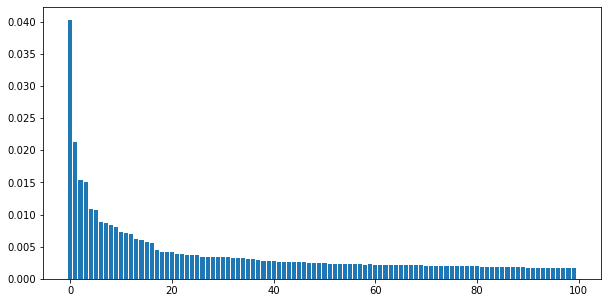

In [33]:
svd = skd.TruncatedSVD(n_components=100, random_state=32864)
hashtag_dimred = pd.DataFrame(svd.fit_transform(hashtag_observations))
print(svd.explained_variance_ratio_.sum())
svd_comps = svd.components_
plt.figure(figsize=(10,5))
plt.bar([i for i in range(len(svd.explained_variance_ratio_))], svd.explained_variance_ratio_)
plt.show()

In [15]:
significant = 0.2 # Threshold for choosing hashtags which are strongly correlated with a SVD component

topics = [] # Topics are defined by the SVD components and contain a group of themes
themes = [] # themes are hashtags that appear within the components

print('Topic:\t Correlated Hashtags (themes):')
for j, comp in enumerate(svd_comps):
    if any(comp>significant):
        theme_list = [feature_names[i] for i in range(len(feature_names)) if comp[i]>significant]
        themes.extend(theme_list)
        topics.append(theme_list)
        print(str(j)+':\t'+str(theme_list))
themes = list(set(themes))
#print(topics)

Topic:	 Correlated Hashtags (themes):
0:	['ces', 'samsung']
1:	['baselworld2015']
2:	['coronavirus', 'cybersecurity']
3:	['cybersecurity']
4:	['brexit', 'fintech']
5:	['digitalelection', 'ge2019']
6:	['brexit']
7:	['journorequest']
8:	['deutschebank']
9:	['bitcoin']
10:	['facebook', 'zuckerberg']
11:	['fortniteworldcup']
12:	['samsung']
13:	['ge2019']
14:	['ai', 'artificialintelligence']
15:	['bhusa']
16:	['spook']
17:	['apple']
18:	['chcity']
19:	['scrollfreeseptember']
20:	['aspensecurity']
21:	['appseceu']
22:	['appseceu', 'blacklivesmatter', 'libreplanet2020', 'privacy', 'technology']
23:	['mifidii']
24:	['bbcclick']
25:	['gchq']
26:	['breaking']
27:	['awssummit', 'blockchain', 'futurefest']
28:	['awssummit']
29:	['ces2019']
30:	['5g', 'lockdown']
31:	['blacklivesmatter', 'covid19', 'cybercrime']
32:	['bheu']
33:	['covid19', 'internationalwomensday', 'libreplanet2020', 'privacy']
34:	['libreplanet2020', 'russiareport']
35:	['internationalwomensday', 'russiareport']
36:	['may4th', '

In [ ]:
list(zip(hashtag_dimred.max(axis=1), hashtag_dimred.idxmax(axis=1)))

In [43]:
def check_for_matches(tag_list, topic_list):
    '''
    
    '''
    matches = []
    
    # Compare list of hashtags in tweet against those in each topic
    potential_matches = [bool(set(tag_list).intersection(set(topic))) for topic in topic_list]
    if any(potential_matches):
        matches.extend([i for i in range(len(potential_matches)) if potential_matches[i]])
    else:
        matches.append(-1)
    return matches

possible_topics = data['hashtags'].apply(lambda x: check_for_matches(eval(x), topics))
possible_topics

1            [-1]
21           [-1]
75           [68]
77           [-1]
93           [-1]
           ...   
28661    [90, 96]
28676        [-1]
28679        [-1]
28681        [-1]
28693        [-1]
Name: hashtags, Length: 3364, dtype: object

In [44]:
print(len(possible_topics))
subsetA = possible_topics[possible_topics.astype(str) != '[]']
print(len(subsetA))
subsetA_exploded = subsetA.explode().unique()
print([i for i in range(100) if i not in subsetA_exploded])
subsetB = subsetA[subsetA.apply(lambda x: len(x))==1]
print(len(subsetB))
print(len(subsetB.explode().unique()))

3364
3364
[99]
2719
58


In [45]:
labelled_data = data.assign(topic_labels=possible_topics.values)
labelled_data

,tweet_id,text,hashtags,topic_labels
1,1298655692623142914,it s nationaljealousidonthaveadogday,['nationaljealousidonthaveadogday'],[-1]
21,1295296427204186113,rt very excited to see today that blood and oi...,['bloodandoil'],[-1]
75,1288463678367510533,rt approximately one fifth of covid patients a...,['covid'],[68]
77,1288228886774460417,rt today on thejournal the situation in rural ...,['thejournal'],[-1]
93,1286391864195796994,new mexico public defenders prosecutors and ad...,['albuquerque'],[-1]
...,...,...,...,...
28661,1189939842064539648,rt bugbountyradar this month s top bug bounty ...,['bugbountyradar'],"[90, 96]"
28676,1187760868165144576,rt a ddos gang is impersonating known russian ...,"['ddos', 'fancybear']",[-1]
28679,1187727565462618116,rt in this week s socialsec roundup breaches a...,['socialsec'],[-1]
28681,1187645968499597313,rt hackers are pretty much the same as sharks ...,['hacktivity2019'],[-1]


In [46]:
labelled_data['main_label'] = labelled_data['topic_labels'].apply(lambda x: x[0])
labelled_data

,tweet_id,text,hashtags,topic_labels,main_label
1,1298655692623142914,it s nationaljealousidonthaveadogday,['nationaljealousidonthaveadogday'],[-1],-1
21,1295296427204186113,rt very excited to see today that blood and oi...,['bloodandoil'],[-1],-1
75,1288463678367510533,rt approximately one fifth of covid patients a...,['covid'],[68],68
77,1288228886774460417,rt today on thejournal the situation in rural ...,['thejournal'],[-1],-1
93,1286391864195796994,new mexico public defenders prosecutors and ad...,['albuquerque'],[-1],-1
...,...,...,...,...,...
28661,1189939842064539648,rt bugbountyradar this month s top bug bounty ...,['bugbountyradar'],"[90, 96]",90
28676,1187760868165144576,rt a ddos gang is impersonating known russian ...,"['ddos', 'fancybear']",[-1],-1
28679,1187727565462618116,rt in this week s socialsec roundup breaches a...,['socialsec'],[-1],-1
28681,1187645968499597313,rt hackers are pretty much the same as sharks ...,['hacktivity2019'],[-1],-1


In [48]:
labelled_data.groupby('main_label')['text'].apply(lambda x: ' '.join(x))

main_label
-1     it s nationaljealousidonthaveadogday rt very e...
 0     we do see a lot of tech simon touted as someth...
 1     rt meet the makers of the world s wildest watc...
 2     rt covering a college admissions sentencing fo...
 4     rt theresa may says she ll resign no matter ho...
                             ...                        
 92    qualcomm thinks its fingerprint sensor beats a...
 93    racing drones w st person views on the adrenal...
 94    rt from the magazine explores how remoteworkin...
 95    couldn t think of anything particularly remark...
 98    rt surf s up goes for a wild ride at the austr...
Name: text, Length: 80, dtype: object

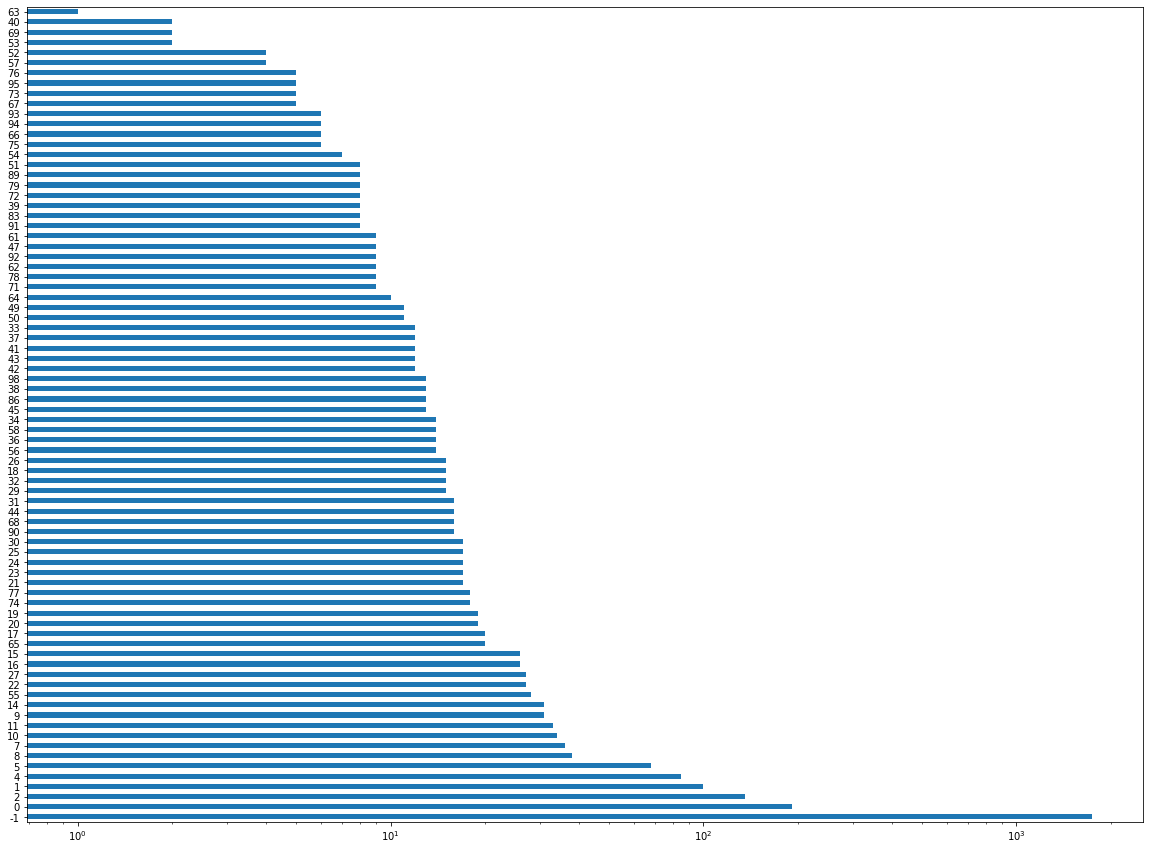

In [33]:
labelled_data['main_label'].value_counts().plot.barh()
fig = plt.gcf()
fig.set_size_inches(20,15)
plt.xscale('log')
plt.show()

In [27]:
topic_df = pd.DataFrame(zip(range(len(topics)), topics), columns=['topic_id', 'topic_hashtags'])
topic_df

,topic_id,topic_hashtags
0,0,"[ces, samsung]"
1,1,[baselworld2015]
2,2,"[coronavirus, cybersecurity]"
3,3,[cybersecurity]
4,4,"[brexit, fintech]"
...,...,...
94,94,"[bhasia, qualcomm, remoteworking]"
95,95,"[inktober2019, qualcomm, robot]"
96,96,[bugbountyradar]
97,97,"[assange, mwc]"


In [28]:
labelled_data.to_csv('../data/cleaned/labelled_cyber_journo_tweets.csv', index=False)
topic_df.to_csv('../data/cleaned/cyber_journo_topic_labels.csv', index=False)